In [77]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import random


In [78]:
# 재현성을 위해 random seed 설정
random.seed(42)
np.random.seed(42)

In [79]:
# 데이터 준비
X = np.array([[1], [2], [3], [4], [5]])  # 독립 변수
y = np.array([2, 4, 5, 4, 5])  # 종속 변수

In [80]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [81]:
# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [82]:
# 예측 및 평가
predictions = model.predict(X_test)

In [83]:
# 결과 출력
print("학습 데이터 크기:", X_train.shape[0])
print("테스트 데이터 크기:", X_test.shape[0])
print("\n모델 계수:")
print("기울기 (slope):", model.coef_[0])
print("절편 (intercept):", model.intercept_)
print("\n테스트 세트 실제 값:", y_test)
print("테스트 세트 예측 값:", predictions)
print("\n모델 성능:")
print("R² 점수:", r2_score(y_test, predictions))
print("평균 제곱 오차 (MSE):", mean_squared_error(y_test, predictions))

학습 데이터 크기: 4
테스트 데이터 크기: 1

모델 계수:
기울기 (slope): 0.6857142857142857
절편 (intercept): 1.7714285714285714

테스트 세트 실제 값: [4]
테스트 세트 예측 값: [3.14285714]

모델 성능:
R² 점수: nan
평균 제곱 오차 (MSE): 0.7346938775510206


c:\aiproject310\.venv\lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


In [84]:
# 어떤 건강 지표가 당뇨병 예측에 더 중요한 영향을 미치는지 파악하는 선형회귀 예
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
# 데이터 로드
df = pd.read_csv('dataset/diabetes.csv')

In [86]:
#데이터 확인
print("데이터셋 크기:", df.shape)
print("\n처음 5개 행:")
print(df.head())
print("\n기술통계:")
print(df.describe())

데이터셋 크기: (768, 9)

처음 5개 행:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0 33.60   
1            1       85             66             29        0 26.60   
2            8      183             64              0        0 23.30   
3            1       89             66             23       94 28.10   
4            0      137             40             35      168 43.10   

   DiabetesPedigreeFunction  Age  Outcome  
0                      0.63   50        1  
1                      0.35   31        0  
2                      0.67   32        1  
3                      0.17   21        0  
4                      2.29   33        1  

기술통계:
       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
count       768.00   768.00         768.00         768.00   768.00 768.00   
mean          3.85   120.89          69.11          20.54    79.80  31.99   
std           3.37    31.97          

In [87]:
# 독립변수(X)와 종속변수(y) 분리
X = df.drop('Outcome', axis=1)  # Outcome을 제외한 모든 특성
y = df['Outcome']

In [88]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [89]:
# 모델 생성 및 학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [90]:
# 예측
y_pred = model.predict(X_test)

In [91]:
#모델평가
print("\n모델 성능:")
print("R2 점수:", r2_score(y_test, y_pred))
print("평균 제곱 오차(MSE):", mean_squared_error(y_test, y_pred))
print("평균 절대 오차(MAE):", mean_absolute_error(y_test, y_pred))


모델 성능:
R2 점수: 0.25500281176741757
평균 제곱 오차(MSE): 0.17104527280850101
평균 절대 오차(MAE): 0.34812825999928226


In [92]:
#특성 중요도 분석
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance':np.abs(model.coef_)
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("\n 특성 중요도:")
print(feature_importance)


 특성 중요도:
                    feature  importance
6  DiabetesPedigreeFunction        0.11
5                       BMI        0.02
0               Pregnancies        0.01
7                       Age        0.01
1                   Glucose        0.01
2             BloodPressure        0.00
3             SkinThickness        0.00
4                   Insulin        0.00


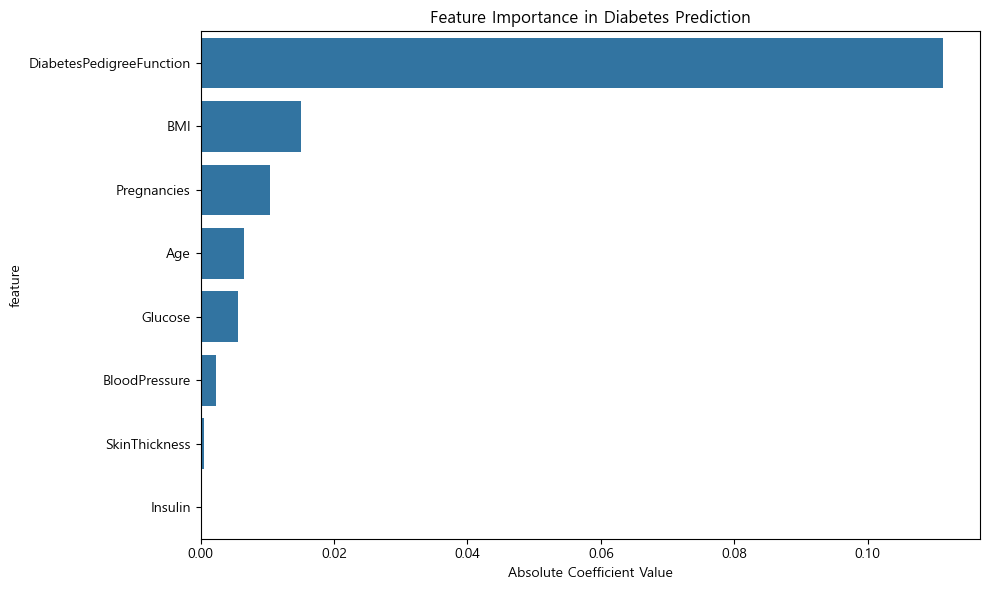

In [93]:
# 시각화: 특성 중요도
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance in Diabetes Prediction')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

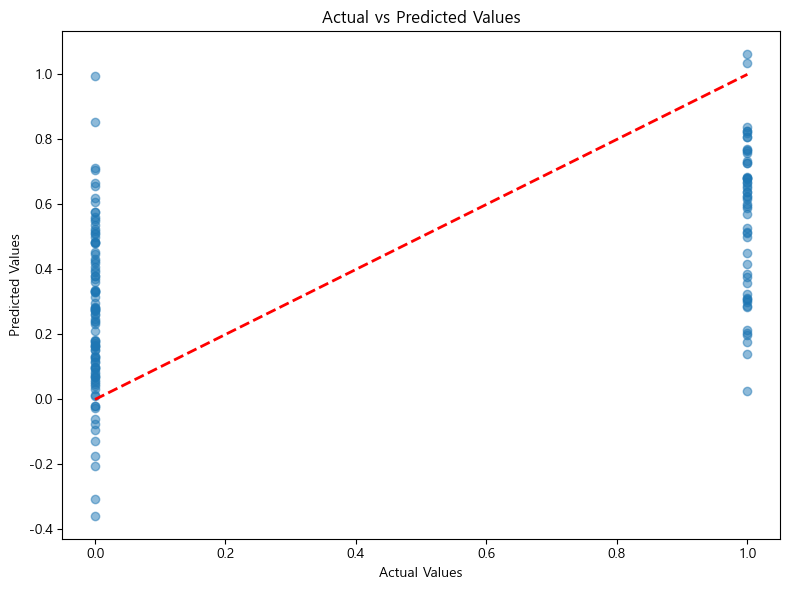

In [94]:
# 시각화: 실제값 vs 예측값
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.tight_layout()
plt.show()

In [95]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [96]:
#샘플데이터 생성
# 공부시간(X1)과 과외 시간(X2)에 따른 시험 점수 (Y) 예측
study_hours = np.array([2, 3, 4, 5, 4, 6, 7, 8, 5, 4])  # 하루 공부 시간
tutor_hours = np.array([0, 1, 0, 2, 1, 3, 2, 3, 2, 1])  # 주간 과외 시간
test_scores = np.array([60, 70, 75, 85, 75, 90, 92, 95, 80, 75])  # 시험 점수

In [97]:
#입력 데이터 형태 맞추기
X=np.column_stack((study_hours, tutor_hours))
y=test_scores

In [98]:
#모델 생성 및 학습
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [99]:
#결과 출력
print("회귀 계수:")
print(f"공부 시간: {model.coef_[0]:.2f}")
print(f"과외 시간: {model.coef_[1]:.2f}")
print(f"절편: {model.intercept_:.2f}")

회귀 계수:
공부 시간: 4.87
과외 시간: 1.94
절편: 53.39


In [100]:
# 새로운 데이터로 예측
new_student=np.array([[6,2]])
prediction = model.predict(new_student)
print(f"\n예측 점수: {prediction[0]:.1f}")


예측 점수: 86.5


In [101]:
# 모델 성능 평가 (R-squared)
r_squared = model.score(X, y)
print(f"R-squared: {r_squared:.4f}")

R-squared: 0.9613


In [102]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [103]:
# 폰트지정
plt.rcParams['font.family'] = 'Malgun Gothic'
# 마이너스 부호 깨짐 지정
plt.rcParams['axes.unicode_minus'] = False
# 숫자가 지수표현식으로 나올 때 지정
pd.options.display.float_format = '{:.2f}'.format

In [104]:
# 샘플 데이터 생성
np.random.seed(42)
n_samples = 100

In [105]:
# 독립변수 생성
X1 = np.random.normal(0, 1, n_samples)
X2 = np.random.normal(0, 1, n_samples)
X3 = np.random.normal(0, 1, n_samples)

In [106]:
# 종속변수 생성(Y = 2X1 + 3X2 + 1.5X3 + 오차)
Y = 2*X1+3*X2+1.5*X3+np.random.normal(0,1,n_samples)

In [107]:
# 데이터 프레임 생성
data = pd.DataFrame({
    'X1': X1,
    'X2': X2,
    'X3': X3,
    'Y':Y
})

In [108]:
# 학습용과 테스트용 데이터 분리
X=data[['X1', 'X2', 'X3']]
y=data['Y']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [109]:
# 모델학습
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [110]:
#예측
y_pred = model.predict(X_test)

In [111]:
# 결과출력
print("회귀 계수:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"\n절편: {model.intercept_:.4f}")
print(f"\nR-squared 값: {r2_score(y_test, y_pred):.4f}")
print(f"평균제곱근오차(RMSE): {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")

회귀 계수:
X1: 1.7882
X2: 2.9284
X3: 1.5135

절편: 0.1535

R-squared 값: 0.9566
평균제곱근오차(RMSE): 0.7174


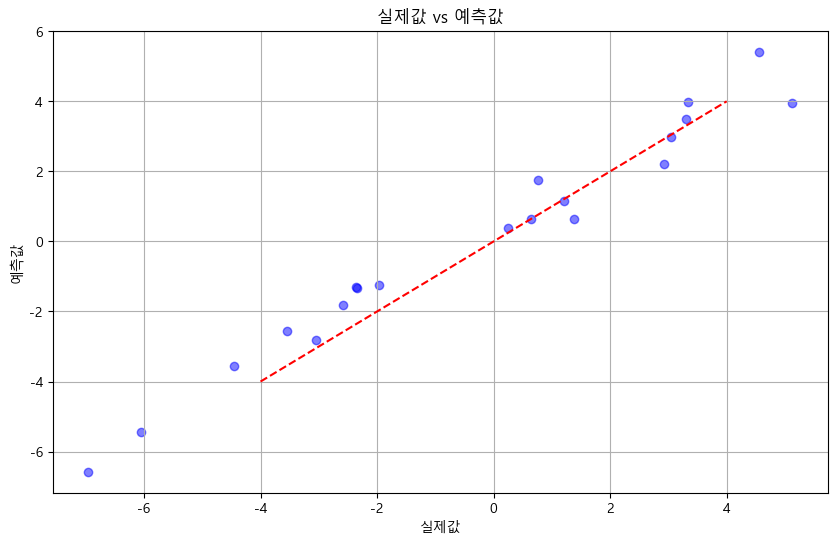

In [112]:
#실제값과 예측값 비교 시각화
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([-4, 4], [-4, 4], 'r--')  # 대각선
plt.xlabel('실제값')
plt.ylabel('예측값')
plt.title('실제값 vs 예측값')
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [113]:
dataset = pd.read_csv('./dataset/LinearRegressionData.csv')
dataset.head()

,hour,score
0,0.50,10
1,1.20,8
2,1.80,14
3,2.40,26
4,2.60,22


In [114]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [116]:
X,y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64))

In [117]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X,y)

LinearRegression()

In [118]:
y_pred = reg.predict(X)
y_pred

array([  5.00336377,  12.31395163,  18.58016979,  24.84638795,
        26.93512734,  33.20134551,  40.51193337,  45.73378184,
        46.77815153,  52.        ,  55.13310908,  60.35495755,
        62.44369694,  63.48806663,  64.53243633,  71.84302419,
        74.97613327,  87.5085696 ,  89.59730899, 104.2184847 ])

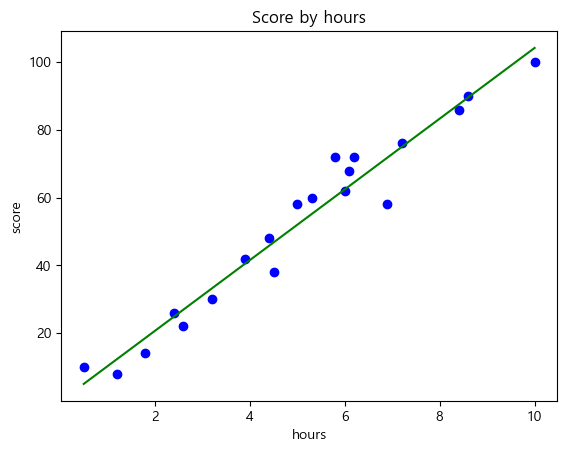

In [128]:
plt.scatter(X,y,color ='blue')
plt.plot(X, y_pred, color='green')
plt.title('Score by hours')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [129]:
print('9 시간 공부 시 예상점수:', reg.predict([[9]]))

9 시간 공부 시 예상점수: [93.77478776]


In [130]:
reg.coef_ #기울기(m)

array([10.44369694])

In [131]:
reg.intercept_ #y절편(b)

-0.218484702867201

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [132]:
dataset = pd.read_csv('./dataset/LinearRegressionData.csv')
dataset

,hour,score
0,0.50,10
1,1.20,8
2,1.80,14
3,2.40,26
4,2.60,22
5,3.20,30
6,3.90,42
7,4.40,48
8,4.50,38
9,5.00,58


In [133]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [135]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
X, len(X)

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 20)

In [136]:
X_train, len(X_train)

(array([[5.3],
        [8.4],
        [3.9],
        [6.1],
        [2.6],
        [1.8],
        [3.2],
        [6.2],
        [5. ],
        [4.4],
        [7.2],
        [5.8],
        [2.4],
        [0.5],
        [6.9],
        [6. ]]),
 16)

In [137]:
X_test, len(X_test)

(array([[ 8.6],
        [ 1.2],
        [10. ],
        [ 4.5]]),
 4)

In [138]:
y, len(y)

(array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100], dtype=int64),
 20)

In [139]:
y_train, len(y_train)

(array([60, 86, 42, 68, 22, 14, 30, 72, 58, 48, 76, 72, 26, 10, 58, 62],
       dtype=int64),
 16)

In [141]:
y_test, len(y_test)

(array([ 90,   8, 100,  38], dtype=int64), 4)

In [142]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()

In [143]:
reg.fit(X_train, y_train)

LinearRegression()

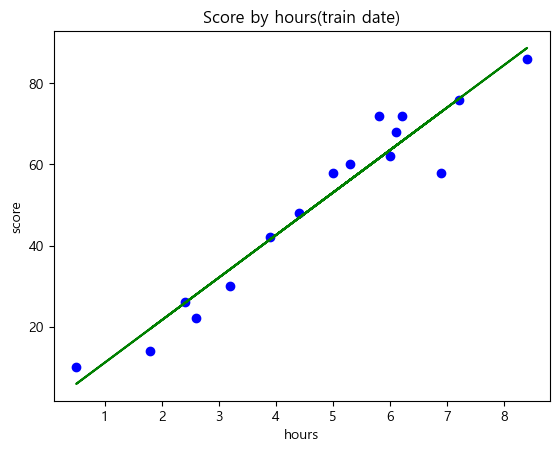

In [150]:
plt.scatter(X_train,y_train, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green')
plt.title('Score by hours(train date)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

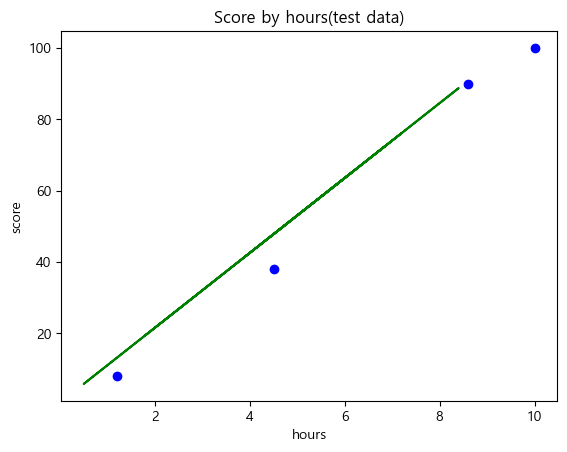

In [154]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_train, reg.predict(X_train), color='green')
plt.title('Score by hours(test data)')
plt.xlabel('hours')
plt.ylabel('score')
plt.show()

In [162]:
reg.coef_
reg.intercept_
reg.score(X_test,y_test)

0.9727616474310156